# Predictive Methods for Gearbox Health Assessment using Machine Learning

## Dataset :-

#### Dataset for the training and testing is taken from JSPL Raigarh's DRI Plant's Kiln-1 Log sheets from previous three months. Log sheets contain huge amount of data so we reduced the log sheet data into a three column dataset which contains Master Motor Load, Slave Motor Load and Breakdown.




#### 0 - No Breakdown
#### 1 - Breakdown

### Dependecies required:-

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
data = pd.read_csv("D2.csv")

In [3]:
data.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,142,140,0
1,161,159,0
2,162,168,0
3,151,148,0
4,154,151,0


In [4]:
data.shape

(2356, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Master Motor Load  2356 non-null   int64
 1   Slave Motor Load   2356 non-null   int64
 2   Breakdown          2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [6]:
data.describe()

,Master Motor Load,Slave Motor Load,Breakdown
count,2356.000000,2356.000000,2356.0
mean,156.115025,151.862054,0.0
std,71.451252,71.109849,0.0
min,0.000000,0.000000,0.0
25%,142.000000,138.000000,0.0
50%,156.000000,152.000000,0.0
75%,173.000000,168.000000,0.0
max,400.000000,398.000000,0.0


In [7]:
data.sample(10)

,Master Motor Load,Slave Motor Load,Breakdown
1268,0,329,0
271,156,152,0
267,146,136,0
922,158,165,0
114,142,140,0
1410,0,372,0
1235,0,212,0
1083,145,142,0
2178,211,0,0
1157,117,112,0


## We only have data for Non-Breakdown cases so we have to generate synthetic data for Breakdown cases we do it as shown below

In [8]:
num_breakdowns = 1200
num_breakdowns_two = 250

synthetic_data_one = pd.DataFrame({
    'Master Motor Load': np.random.randint(185, 260, num_breakdowns),
    'Slave Motor Load': np.random.randint(185, 260, num_breakdowns),
    'Breakdown': np.ones(num_breakdowns, dtype=int)
})

synthetic_data_two = pd.DataFrame({
    'Master Motor Load': np.random.randint(385, 395, num_breakdowns),
    'Slave Motor Load': np.zeros(num_breakdowns),
    'Breakdown': np.ones(num_breakdowns, dtype=int)
})

synthetic_data_three = pd.DataFrame({
    'Master Motor Load': np.zeros(num_breakdowns),
    'Slave Motor Load': np.random.randint(385, 395, num_breakdowns),
    'Breakdown': np.ones(num_breakdowns, dtype=int)
})

synthetic_data_four = pd.DataFrame({
    'Master Motor Load': np.random.randint(195, 230, num_breakdowns_two),
    'Slave Motor Load': np.random.randint(155, 185, num_breakdowns_two),
    'Breakdown': np.zeros(num_breakdowns_two, dtype=int)
})

synthetic_data_five = pd.DataFrame({
    'Master Motor Load': np.random.randint(155, 185, num_breakdowns_two),
    'Slave Motor Load': np.random.randint(195, 230, num_breakdowns_two),
    'Breakdown': np.zeros(num_breakdowns_two, dtype=int)
})

In [9]:
synthetic_data_one.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,256,246,1
1,235,214,1
2,241,235,1
3,243,193,1
4,208,232,1


In [10]:
synthetic_data_two.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,390,0.0,1
1,389,0.0,1
2,388,0.0,1
3,391,0.0,1
4,387,0.0,1


In [11]:
synthetic_data_three.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,0.0,389,1
1,0.0,393,1
2,0.0,390,1
3,0.0,388,1
4,0.0,393,1


## Making Final dataset by concatinating both actual data and synthetic data.

In [12]:
final_data = pd.concat([data,synthetic_data_one,synthetic_data_two,synthetic_data_three ,synthetic_data_four,synthetic_data_five ], axis =0)

In [13]:
final_data.shape

(6456, 3)

In [14]:
final_data.head()

,Master Motor Load,Slave Motor Load,Breakdown
0,142.0,140.0,0
1,161.0,159.0,0
2,162.0,168.0,0
3,151.0,148.0,0
4,154.0,151.0,0


In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6456 entries, 0 to 249
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Master Motor Load  6456 non-null   float64
 1   Slave Motor Load   6456 non-null   float64
 2   Breakdown          6456 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 201.8 KB


In [16]:
final_data.describe()

,Master Motor Load,Slave Motor Load,Breakdown
count,6456.000000,6456.000000,6456.000000
mean,185.422398,183.914033,0.557621
std,129.211040,129.525374,0.496707
min,0.000000,0.000000,0.000000
25%,132.000000,128.000000,0.000000
50%,176.000000,173.000000,1.000000
75%,247.000000,247.000000,1.000000
max,400.000000,398.000000,1.000000


In [17]:
final_data.sample(10)

,Master Motor Load,Slave Motor Load,Breakdown
623,246.0,216.0,1
158,140.0,134.0,0
227,389.0,0.0,1
4,154.0,151.0,0
992,0.0,387.0,1
75,200.0,184.0,0
35,195.0,160.0,0
948,389.0,0.0,1
924,386.0,0.0,1
1527,157.0,154.0,0


## Data Visualization

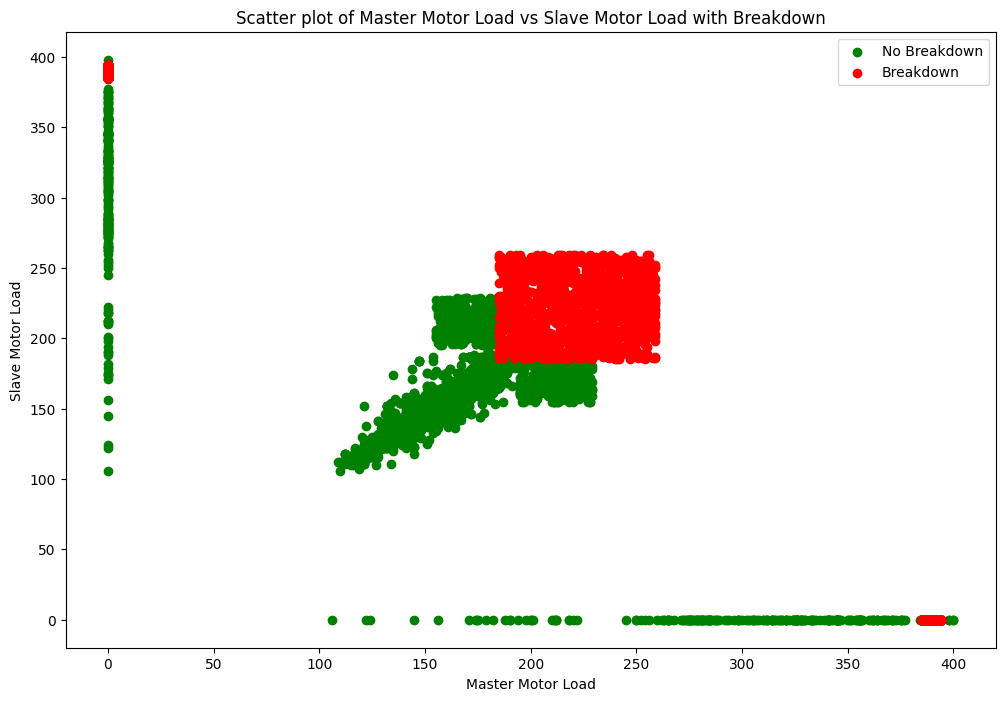

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

df_0 = final_data[final_data['Breakdown'] == 0]
df_1 = final_data[final_data['Breakdown'] == 1]

# Plot the data
plt.figure(figsize=(12, 8))

plt.scatter(df_0['Master Motor Load'], df_0['Slave Motor Load'], color='green', label='No Breakdown')
plt.scatter(df_1['Master Motor Load'], df_1['Slave Motor Load'], color='red', label='Breakdown')

plt.xlabel('Master Motor Load')
plt.ylabel('Slave Motor Load')
plt.title('Scatter plot of Master Motor Load vs Slave Motor Load with Breakdown')
plt.legend()
plt.show()

<Axes: xlabel='Master Motor Load', ylabel='Count'>

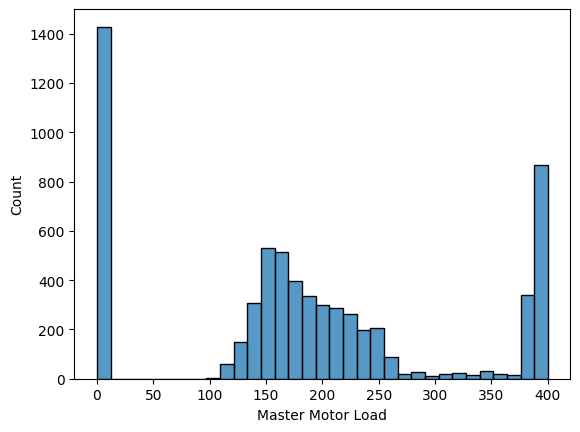

In [19]:
sns.histplot(final_data['Master Motor Load'])

<Axes: xlabel='Slave Motor Load', ylabel='Count'>

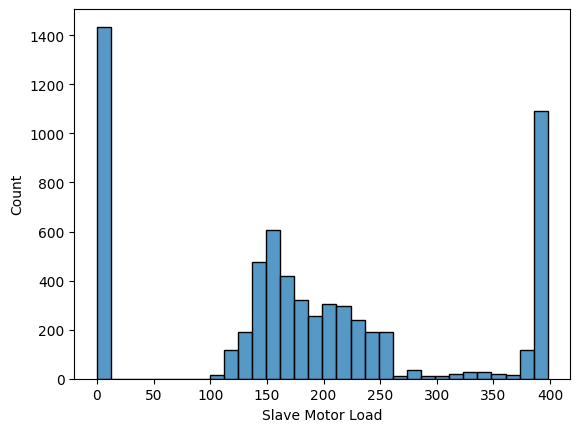

In [20]:
sns.histplot(final_data['Slave Motor Load'])

## Findig the correlation between each columns for prediction

<Axes: >

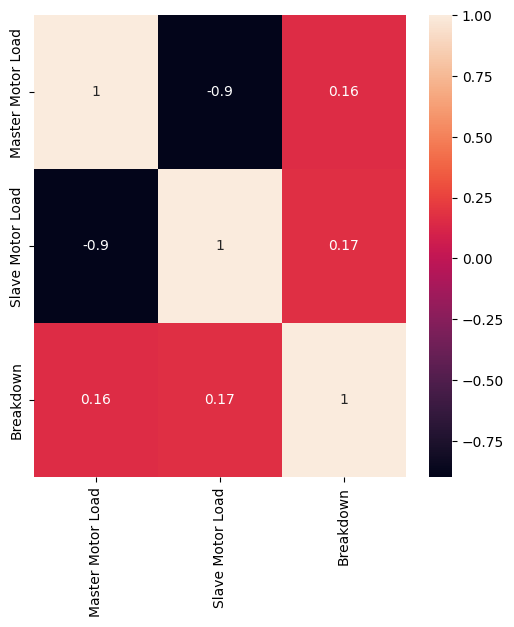

In [21]:
corr = final_data.corr()
plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot=True)

## Splitting the dataset into training and testing parts

In [22]:
from sklearn.model_selection import train_test_split

x = final_data.drop('Breakdown', axis =1)
y = final_data['Breakdown']

In [23]:
x.shape

(6456, 2)

In [24]:
x

,Master Motor Load,Slave Motor Load
0,142.0,140.0
1,161.0,159.0
2,162.0,168.0
3,151.0,148.0
4,154.0,151.0
...,...,...
245,178.0,195.0
246,174.0,210.0
247,183.0,200.0
248,162.0,200.0


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    0
246    0
247    0
248    0
249    0
Name: Breakdown, Length: 6456, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state = 21)

In [27]:
x_train.shape

(4519, 2)

In [28]:
x_train.sample(10)

,Master Motor Load,Slave Motor Load
70,170.0,229.0
706,0.0,391.0
525,241.0,253.0
1133,148.0,144.0
1078,389.0,0.0
678,0.0,389.0
986,0.0,393.0
798,393.0,0.0
216,189.0,210.0
801,0.0,393.0


## Defining a function for evaluating model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# y_test - actual value of sample
# predicted value of sample

def evaluating_model(y_test, y_pred):
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred))
    print("Precision Score:- ", precision_score(y_test, y_pred))
    print("Recall Score:- ", recall_score(y_test, y_pred))
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

## Model Building

## 1. LogisticRegression

Logistic regression is used for binary classification where we use sigmoid function
that takes input as independent variables and produces a probability value between 0 and 1.

<img src="lgr1.png" width="5000" height="6000">
<img src="lgr2.png" width="5000" height="6000">
<img src="lgr3.png" width="5000" height="6000">
<img src="lgr4.png" width="5000" height="6000">
<img src="lgr5.png" width="5000" height="6000">
<img src="lgr6.png" width="5000" height="6000">

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lgr = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
lgr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
}

lgr_search = GridSearchCV(lgr, param_grid=lgr_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
lgr_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=3)

In [31]:
lgr_search.best_estimator_

LogisticRegression(C=0.1, max_iter=10000, solver='saga')

In [32]:
lgr_model = LogisticRegression(C=0.1, max_iter=10000, solver='saga')
lgr_model.fit(x_train, y_train)

lgr_pred = lgr_model.predict(x_test)
evaluating_model(y_test, lgr_pred)

Accuracy Score:-  0.876097057305111
Precision Score:-  0.816933638443936
Recall Score:-  1.0
Confusion Matrix:- 
 [[ 626  240]
 [   0 1071]]


## 2. Naive-Bayes (Gaussian)

<img src="Nb.png" width="500" height="600">

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter
}
nb_search = GridSearchCV(nb, param_grid=nb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
nb_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=3)

In [34]:
nb_search.best_estimator_

GaussianNB()

In [35]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)
evaluating_model(y_test, nb_pred)

Accuracy Score:-  0.7532266391326794
Precision Score:-  0.8283499446290143
Recall Score:-  0.6984126984126984
Confusion Matrix:- 
 [[711 155]
 [323 748]]


## 3. Support Vector Machine

<img src="svm1.png" width="5000" height="6000">

<img src="svm2.png" width="5500" height="6000">

<img src="svm4.png" width="5000" height="6000">

<img src="svm3.png" width="500" height="600">

<img src="svm5.png" width="5000" height="6000">

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

svc_search = GridSearchCV( SVC(), svc_params, refit = True)
svc_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [37]:
svc_search.best_estimator_

SVC(C=1000, gamma=0.001)

In [39]:
svc_model = SVC(C=1000, gamma=0.0001)
svc_model.fit(x_train, y_train)

svc_pred = svc_model.predict(x_test)
evaluating_model(y_test, svc_pred)

Accuracy Score:-  0.9896747547754259
Precision Score:-  0.9943555973659455
Recall Score:-  0.9869281045751634
Confusion Matrix:- 
 [[ 860    6]
 [  14 1057]]


## 4. Decision Tree Classifier

A Decision tree is a tree-like structure that represents a set of decisions and their possible consequences. Each node in the tree represents a decision, and each branch represents an outcome of that decision. The leaves of the tree represent the final decisions or predictions.
Decision trees are created by recursively partitioning the data into smaller and smaller subsets. At each partition, the data is split based on a specific feature, and the split is made in a way that maximizes the information gain.

<img src="dt1.png" width="5000" height="6000">

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_ds(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_

    y_pred = best_model.predict(x_test)

    return best_model

randomized_search_ds(params={
    'criterion': ['entropy', 'gini'],
    'splitter': ['random', 'best'],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01],
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
    'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
    'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
    'max_features': ['sqrt', 'log2', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
    'max_depth': [None, 2, 4, 6, 8],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
})


DecisionTreeClassifier(max_depth=8, max_features=0.7,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.02,
                       min_samples_split=3, min_weight_fraction_leaf=0.0025,
                       random_state=2)

In [41]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.7,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.02,
                       min_samples_split=3, min_weight_fraction_leaf=0.0025,
                       random_state=2)
ds_clf.fit(x_train, y_train)


ds_pred = ds_clf.predict(x_test)
evaluating_model(y_test, ds_pred)

Accuracy Score:-  0.9834796076406814
Precision Score:-  0.9914853358561968
Recall Score:-  0.9785247432306255
Confusion Matrix:- 
 [[ 857    9]
 [  23 1048]]


## 5. Random Forest Classifier

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.
Additionally, the random forest classifier can handle both classification and regression tasks, and its ability to provide feature importance scores makes it a valuable tool for understanding the significance of different variables in the dataset.

<img src="rf1.png" width="5000" height="6000">

<img src="rf2.png" width="5000" height="6000">

In [42]:
from sklearn.ensemble import RandomForestClassifier

def randomized_search_rf(params, runs=20, clf=RandomForestClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_

    y_pred = best_model.predict(x_test)

    return best_model

randomized_search_rf(params={
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'max_features': ['sqrt', 'log2', 0.8, 0.7, 0.6, 0.5, 0.4],
    'max_depth': [None, 2, 4, 6, 8, 10, 20],
})

RandomForestClassifier(max_features='log2', min_samples_leaf=6, random_state=2)

In [43]:
rf_clf = RandomForestClassifier(max_features='log2', min_samples_leaf=6, random_state=2)
rf_clf.fit(x_train, y_train)
pred5 = rf_clf.predict(x_test)
evaluating_model(y_test, pred5)

Accuracy Score:-  0.996386164171399
Precision Score:-  0.9953445065176909
Recall Score:-  0.9981325863678805
Confusion Matrix:- 
 [[ 861    5]
 [   2 1069]]


## 6. XG Boost Classifier

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

In [44]:
from xgboost import XGBClassifier

def randomized_search_xgboost(params, runs=20, clf=XGBClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_

    y_pred = best_model.predict(x_test)

    return best_model

randomized_search_xgboost(params= {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 3]
})

C:\Users\kandu\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [45]:
xgboost_classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2)

xgboost_classifier.fit(x_train, y_train)
xgboost_pred = xgboost_classifier.predict(x_test)
evaluating_model(y_test, xgboost_pred)

Accuracy Score:-  0.9974186886938565
Precision Score:-  0.9953531598513011
Recall Score:-  1.0
Confusion Matrix:- 
 [[ 861    5]
 [   0 1071]]


In [46]:
xgboost_classifier.predict(np.array([230, 170 ]).reshape(1,2))

array([0])

# Advantages

#### Once trained, the model can generalize to new, unseen data and make predictions about whether a combination of motor loads will lead to a breakdown. This is particularly useful for real-time monitoring and prediction, where you might not have time to manually apply filters to new data.

#### Model-based approach: Machine learning models can capture complex, non-linear relationships between features that simple rules (like a sum filter) might miss. For instance, the interaction between master motor load and slave motor load might not be perfectly linear or additive

#### Machine learning models can be deployed at scale to handle large datasets and continuous data streams, making them suitable for industrial applications where loads can change dynamically and rapidly. ( Excel is not designed to handle very large datasets efficiently, and applying filters on large datasets can be slow and cumbersome.)

#### Machine learning models can be integrated into automated systems for real-time monitoring and decision-making. This reduces human error and ensures consistent application of the breakdown prediction logic. ( Applying filters manually or even through scripts requires periodic intervention and does not seamlessly integrate into automated systems.)

#### Training a model on this data allows it to learn the underlying patterns and relationships that lead to breakdowns, which can be more complex than a simple threshold. The model can then make predictions on new data efficiently.

####  The model can provide early warnings of potential breakdowns before they happen, allowing for preventive measures to be taken. This proactive approach is more efficient than reactive filtering after the fact.

In [47]:
'''
model building

export using pickle

build flask layer

deploy on a server 

PLC update, advanced

build an GUI - take output from server
'''

'\nmodel building\n\nexport using pickle\n\nbuild flask layer\n\ndeploy on a server \n\nPLC update, advanced\n\nbuild an GUI - take output from server\n'

In [48]:
best_model =  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2)
best_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [49]:
import pickle
pickle.dump(best_model, open('model.pkl','wb'))

In [50]:
# ds_2 = pd.read_csv("D2.csv")
# ds_2.head()

In [51]:
# final_data_2 = pd.concat([ds_2,synthetic_data_one,synthetic_data_two,synthetic_data_three ], axis =0)

In [52]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# df_0 = final_data_2[final_data_2['Breakdown'] == 0]
# df_1 = final_data_2[final_data_2['Breakdown'] == 1]

# # Plot the data
# plt.figure(figsize=(12, 8))

# plt.scatter(df_0['Master Motor Load'], df_0['Slave Motor Load'], color='green', label='No Breakdown')
# plt.scatter(df_1['Master Motor Load'], df_1['Slave Motor Load'], color='red', label='Breakdown')

# plt.xlabel('Master Motor Load')
# plt.ylabel('Slave Motor Load')
# plt.title('Scatter plot of Master Motor Load vs Slave Motor Load with Breakdown')
# plt.legend()
# plt.show()

In [53]:
# x_dash = final_data_2.drop('Breakdown', axis =1)
# y_dash = final_data_2['Breakdown']

# x_train, x_test, y_train, y_test = train_test_split(x_dash,y_dash,test_size =0.3, random_state = 21)

In [54]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svc_params = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}

# svc_search = GridSearchCV( SVC(), svc_params, refit = True)
# svc_search.fit(x_train, y_train)

In [55]:
# svc_search.best_estimator_

In [56]:
# model = SVC(C=1, gamma=1)

# model.fit(x_train, y_train)

# model.predict(np.array([500,500]).reshape(1,2))

In [57]:
# from sklearn.ensemble import RandomForestClassifier

# def randomized_search_rf(params, runs=20, clf=RandomForestClassifier(random_state=2)):
#     rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
#     rand_clf.fit(x_train, y_train)
#     best_model = rand_clf.best_estimator_

#     y_pred = best_model.predict(x_test)

#     return best_model

# randomized_search_rf(params={
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
#     'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
#     'max_features': ['sqrt', 'log2', 0.8, 0.7, 0.6, 0.5, 0.4],
#     'max_depth': [None, 2, 4, 6, 8, 10, 20],
# })


In [58]:
# rf_clf = RandomForestClassifier(max_depth=4, min_samples_leaf=4, random_state=2)
# rf_clf.fit(x_train, y_train)

# rf_clf.predict(np.array([175,160]).reshape(1,2))